In [22]:
from src import *
from plots import *
import pandas as pd
import nltk
import seaborn as sns 
import matplotlib.pyplot as plt 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#!python -m spacy download de

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
CHAT_TEXT_FILE = "C:/Users/jonas/Documents/Dokumente/Projekte/00_DATA/chats/WhatsApp Chat_example.txt"
BAR_COLOR = "royalblue"

In [24]:
df = import_data(CHAT_TEXT_FILE)

In [25]:
df.head()

,RAW,date,time,person,message,date_time,weekday,month,year,hour,text_length
0,"22.07.18, 10:05 - User 0: 👋",2018-07-22,10:05:00,User 0,👋,2018-07-22 10:05:00,6,7,2018,10,1.0
1,"22.07.18, 10:07 - User 3: Hallöchen ❤",2018-07-22,10:07:00,User 3,Hallöchen ❤,2018-07-22 10:07:00,6,7,2018,10,11.0
2,"22.07.18, 10:12 - User 1: Hallöle 🤪😘😘😘",2018-07-22,10:12:00,User 1,Hallöle 🤪😘😘😘,2018-07-22 10:12:00,6,7,2018,10,12.0
3,"22.07.18, 10:15 - User 3: Das kann ich auch 😎",2018-07-22,10:15:00,User 3,Das kann ich auch 😎,2018-07-22 10:15:00,6,7,2018,10,19.0
4,"22.07.18, 10:15 - User 1: Super👍🏻👍🏻👍🏻😘",2018-07-22,10:15:00,User 1,Super👍🏻👍🏻👍🏻😘,2018-07-22 10:15:00,6,7,2018,10,12.0


In [26]:
from plotly_plots import Plotter

P = Plotter()

In [27]:
plt_data = pd.DataFrame()
plt_data["messages_per_person"]=df.groupby(['person']).count()["message"]
plt_data.reset_index(inplace=True)
x=plt_data["messages_per_person"]
y=plt_data["person"]

pie = P.pieplot(data=plt_data, values="messages_per_person", names="person",title_text="Messages per person")
pie.show()

In [28]:
data = df[df["text_length"]<=200][["text_length","person"]]

bar = P.histogram(data=data, x="text_length", color=data["person"], title_text="Text lenght per person", xaxis_title="Text length [characters]", yaxis_title="Count")
bar.show()

In [29]:
box1=P.boxplot(data = data, y="text_length", x="person", title_text="Text lenght per person", xaxis_title="Text length [characters]")
box1.show()

In [30]:
plot_data = pd.DataFrame()
df_temp = df[df["person"] == "User 0"]
plot_data["messages_per_hour_per_person"] = df_temp.groupby(['hour']).count()['message'] / len(df_temp.groupby(['hour']).count().index)
plot_data.reset_index(inplace=True)

bar0 = P.barplot(data=plot_data, x="hour",y="messages_per_hour_per_person",title_text="Average messages per hour for Jonas", xaxis_title="Hour of the day", yaxis_title="Messages",xtickvals=plot_data["hour"])
bar0.show()

In [31]:
plot_data = pd.DataFrame()
plot_data["message_per_hour"] = df.groupby(['hour']).count()['message'] / len(df.groupby(['hour']).count().index)
plot_data.reset_index(inplace=True)

bar1 = P.barplot(data=plot_data, x="hour",y="message_per_hour", title_text="Average messages per hour", xaxis_title="Hour of the day", yaxis_title="Messages",xtickvals=plot_data["hour"])
bar1.show()

In [32]:
plot_data = pd.DataFrame()
plot_data["text_length"] = df.groupby(['weekday']).mean()["text_length"]
plot_data.reset_index(inplace=True)
plot_data["weekday"] = map_datetime(plot_data["weekday"], "week")

bar2 = P.barplot(data=plot_data, x="weekday",y="text_length", title_text="Average text length per weekday", xaxis_title="weekday", yaxis_title="Text length",xtickvals=plot_data["weekday"])
bar2.show()

# Hier weiter machen

In [33]:
plot_data = pd.DataFrame()
plot_data["messages"] = df.groupby(['weekday']).count()['message'] / len(df.groupby(['weekday']).count().index)
plot_data.reset_index(inplace=True)
plot_data["weekday"] = map_datetime(plot_data["weekday"], "week")

bar3 = P.barplot(data=plot_data, x="weekday",y="messages", title_text="Average messages per weekday", xaxis_title="weekday", yaxis_title="Messages",xtickvals=plot_data["weekday"])
bar3.show()

In [34]:
plot_data = pd.DataFrame()
plot_data["messages"] = df.groupby(['month']).count()['message'] / len(df.groupby(['month']).count().index)
plot_data.reset_index(inplace=True)
plot_data["month"] = map_datetime(plot_data["month"], "month")

bar4 = P.barplot(data=plot_data, x="month",y="messages", title_text="Average messages per month", xaxis_title="Month", yaxis_title="Messages",xtickvals=plot_data["month"])
bar4.show()

'''
bar4 = barplot(data=messages_per_month, title = "Messages per Month")
fig = bar4.plot(figsize=(10,5), title_size=16, x_label="Month", y_label="Percentage")
plt.show()
'''

'\nbar4 = barplot(data=messages_per_month, title = "Messages per Month")\nfig = bar4.plot(figsize=(10,5), title_size=16, x_label="Month", y_label="Percentage")\nplt.show()\n'

In [35]:
messages_per_date =  pd.DataFrame(df.groupby(['date']).count()['message'])
r = pd.date_range(start=messages_per_date.index.min(), end=messages_per_date.index.max())
messages_count = messages_per_date.reindex(r).fillna(0).rename_axis('date').reset_index()

plot_data = messages_count

line1 = P.lineplot(data=plot_data, x="date",y="message", title_text="Messages per date", xaxis_title="Date", yaxis_title="Messages")
line1.show()

In [36]:
df["emojis"] = ""
df["emojis"] = df['message'].apply(lambda x: get_emojis(x))
df_emojies = count_emojis_by_name(df)
plot_data = df_emojies[df_emojies["count"] >= 5]

bar5 = P.barplot(data=plot_data, x="emoji", y="count", color="person", barmode="group", title_text="Emojies used by person", xaxis_title="Emojies", yaxis_title="Count",xtickangle=0)
bar5.show()

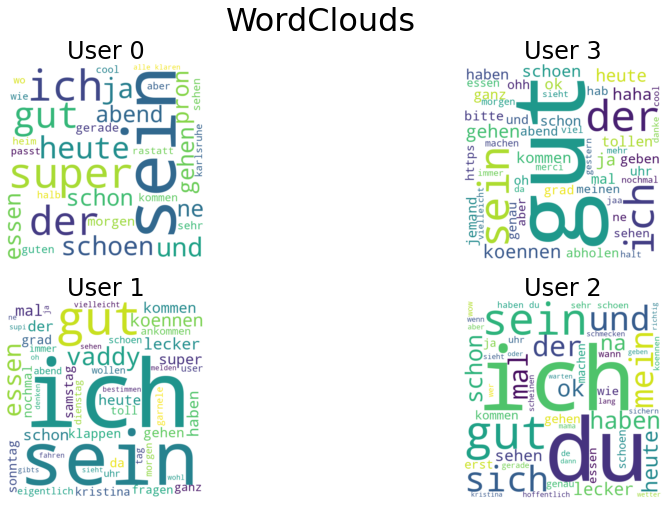

In [37]:
word_clouds1 = word_clouds_plot(data=df, title = "WordClouds")
fig = word_clouds1.plot(figsize=(15,8), title_size=32)
plt.show()

# Interday response time

In [38]:
wait_time = compute_wait_time(df)

In [39]:
box2=P.boxplot(data=wait_time, y="person", x="wait_time", title_text="Average Wait times per Person")#, xaxis_title="Text length [characters]")
box2.show()

In [40]:
plot_data = wait_time[wait_time["wait_time"]<=60]

bar5 = P.histogram(data=plot_data, x="wait_time", color="person", title_text="Wait times per Person", xaxis_title="Emojies", yaxis_title="Count",xtickangle=0)
bar5.show()

In [41]:
plot_data = wait_time.fillna(0)
line2 = P.lineplot(data=plot_data, x="date_time",y="wait_time", color="person", title_text="Wait times per date", xaxis_title="Date", yaxis_title="Wait times")
line2.show()

In [42]:
plot_data = wait_time.fillna(0)
plot_data["hour"] = plot_data["date_time"].dt.hour 
plot_data = plot_data.groupby(["hour","person"]).mean()["wait_time"].unstack().reset_index().melt(id_vars=["hour"])
plot_data = plot_data[plot_data["value"] <= 50]

bar_test = P.barplot(data=plot_data, x="hour", y="value",color="person", title_text="Average wait times per hour", xaxis_title="Hour of the day", yaxis_title="Wait time", xtickvals=plot_data["hour"])
bar_test.show()


# Ideas:

Categorize Messages